In [255]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from loadTDMS import *
from fft_test import *
import pandas as pd
import seaborn as sns

In [12]:
orig = cv2.imread(rf"C:\Users\pmg07\Documents\HiView Files\20230113-0117\20.jpg")
orig2 = cv2.imread(rf"C:\Users\pmg07\Documents\HiView Files\20230113-0117\100.jpg")

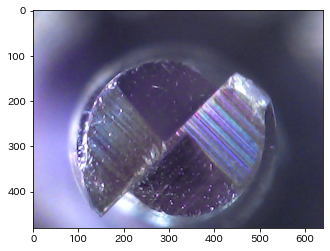

In [13]:
plt.imshow(orig)

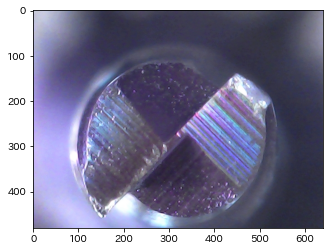

In [14]:
plt.imshow(orig2)

In [16]:
%matplotlib qt
blend=cv2.addWeighted(orig,0.3,orig2,0.5,0)
blendsrc = cv2.cvtColor(blend, cv2.COLOR_BGR2RGB)
plt.imshow(blendsrc)

In [43]:
a = np.array([0,1781,7383,12145,19785,27031,37223,37900,41214,47963,49813,60434,83165,95224,100517,139299])
b = np.array([0
,12895
,15159
,24557
,30439
,35155
,60776
,61804
,69145
,70037
,75336
,84085
,88329
,99482
,162981
,162991
])
c = np.array([0
,3929
,5532
,8324
,11029
,13718
,16458
,17820
,19991
,22731
,27264
,34742
,46289
,57336
,62575
,68796])


In [44]:
np.save(rf"Z:\200 Produced_data\master_paper_data\flank wear\A_FlankWear",a)
np.save(rf"Z:\200 Produced_data\master_paper_data\flank wear\B_FlankWear",b)
np.save(rf"Z:\200 Produced_data\master_paper_data\flank wear\C_FlankWear",c)

In [5]:
a = np.load(rf"Z:\200 Produced_data\master_paper_data\flank wear\A_FlankWear.npy")
b = np.load(rf"Z:\200 Produced_data\master_paper_data\flank wear\B_FlankWear.npy")
c = np.load(rf"Z:\200 Produced_data\master_paper_data\flank wear\C_FlankWear.npy")

In [6]:
len(a)

16

In [7]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,16+1, 1))
ax.set_xticklabels(np.arange(0,300+1,20))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='Flank wear Area')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')

ax.plot(a, label="A", marker='o' ,markersize=20)
ax.plot(b, label="B", marker='^' ,markersize=20)
ax.plot(c, label="C", marker='x' ,markersize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.grid()

In [50]:
d = np.load(rf"Z:\200 Produced_data\master_paper_data\C\CF\CF_1-460.npy")

In [53]:
new_n = d

In [54]:
interval =1023
new_nn = new_n.reshape(int(len(new_n)/interval), interval)
hokan = 1200-1023
avg = np.average(new_nn, axis=1)
avg = avg.reshape(len(avg), 1)
avg = np.repeat(avg, hokan, axis=1)
new_nn  = np.block([new_nn, avg])
new_nn = new_nn.ravel()
print(len(new_nn)/1200)

460.0


In [57]:
np.save(rf"Z:\200 Produced_data\master_paper_data\C\CF\CF_1-460.npy", new_nn)

In [3]:
a = np.load(rf"Z:\200 Produced_data\master_paper_data\A\CF\CF_1-460.npy")
b = np.load(rf"Z:\200 Produced_data\master_paper_data\B\CF\CF_1-460.npy")
c = np.load(rf"Z:\200 Produced_data\master_paper_data\C\CF\CF_1-460.npy")

In [59]:
len(a)

552000

In [41]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,460*1200+1, 1200*20))
ax.set_xticklabels(np.arange(0,460+1,20))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='Cutting Force[N]')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')
plt.ylim(150,400)


ax.plot(a, label="A", linestyle="solid", linewidth="3", marker='o',markevery=72000, markersize=13 )
ax.plot(b, label="B", linestyle="dotted", linewidth="3", marker='^',markevery=72000, markersize=13 )
ax.plot(c, label="C", linestyle="dashed", linewidth="3", marker='*',markevery=72000, markersize=13 )



# ax.plot(a, label="A", linewidth="5",color="blue")
# ax.plot(b, label="B", linewidth="5",color="blue")
# ax.plot(c, label="C", linewidth="5",color="blue")


plt.grid()
plt.legend()

In [42]:
path = rf"Z:\100 Raw_data\20230113---切削実験\AE\Cutting\AE_51.tdms"

In [44]:
d = load_tdms(path, ch_num=3)

In [45]:
dt = 1/10**6
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
y_label = "amplitude"
y_unit = "V"

In [55]:
start = 1000000
interval = 25000

s = d[1][start:start+interval]
w = d[0][start:start+interval]
N = len(s)
fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
fq_s, amp_s = FFT_main(fq, s, dt, split_t_r, overlap, window_F)
fq_w, amp_w = FFT_main(fq, w, dt, split_t_r, overlap, window_F)

plt.plot(fq_w, 20*np.log10(amp_w), linewidth="3", label="work")
plt.plot(fq_s, 20*np.log10(amp_s), linewidth="3", label="spindle")

plt.legend()

In [197]:
num = 10
s_s = np.load(rf"Z:\200 Produced_data\master_paper_data\C\AE\AE_spindle_1-120_s{num}.npy")
s_w = np.load(rf"Z:\200 Produced_data\master_paper_data\C\AE\AE_work_1-460_s{num}.npy")

In [198]:
temp = np.corrcoef(s_s,s_w)
temp[0][1]

0.9004206172441698

In [226]:
for tool in ["A", "B", "C"]:
    corr_matrix = []
    for i in range(1,11):
        s_s = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_spindle_1-120_s{i}.npy")
        s_w = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_work_1-120_s{i}.npy")
        temp = np.corrcoef(s_s,s_w)
#         corr_matrix.append([i,temp[0][1]])
        corr_matrix.append(temp[0][1])
        
    np.save(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_{tool}_1-120",np.array(corr_matrix))
        
#         dict1 = dict(corr= corr_matrix[:])
#         df1 = pd.DataFrame(data=dict1)
#         df1.to_csv(rf'Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_{tool}_1-460.csv')        

In [210]:
df = pd.read_csv(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_1-120.csv")

In [223]:
df

,Unnamed: 0,A,B,C
0,0,-0.549796,-0.493247,-0.782744
1,1,-0.762080,0.095309,0.459245
2,2,-0.853727,0.257764,0.899394
3,3,0.858873,0.969291,0.991898
4,4,0.987888,0.982728,0.979838
5,5,0.984397,0.981670,0.997685
6,6,0.984129,0.909483,0.991046
7,7,0.770889,0.402813,0.992926
8,8,0.584880,-0.107899,0.962042
9,9,0.483998,-0.187226,0.932280


In [224]:
df = pd.read_csv(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_1-460.csv")
df

,Unnamed: 0,A,B,C
0,0,0.921343,-0.036870,-0.727093
1,1,0.706306,0.765597,-0.114092
2,2,0.582288,0.630321,0.797116
3,3,0.843117,0.976168,0.674200
4,4,0.961797,0.991234,0.693675
5,5,0.964282,0.986790,0.954349
6,6,0.928226,0.960494,0.940829
7,7,0.673394,0.754284,0.960762
8,8,0.188795,0.192776,0.911668
9,9,0.118163,0.163140,0.900421


In [117]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xticks(np.arange(0,120*1200+1, 1200*20))
ax.set_xticklabels(np.arange(0,120+1,20))
ax.set_xlabel(xlabel='Path Number')
ax.set_ylabel(ylabel='S(AE spectrum Area)')
ax.tick_params(axis = 'x')
ax.tick_params(axis = 'y')

# plt.ylim(0.2,0.6)

plt.plot(s_w, label = "work", linewidth="3")
plt.plot(s_s, label = "spindle", linewidth="3")

plt.legend()
plt.grid()

In [245]:
A = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_A_1-120.npy")
B = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_B_1-120.npy")
C = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_C_1-120.npy")

In [246]:
print(A)
print(B)
print(C)

[-0.54979629 -0.76208003 -0.8537266   0.85887339  0.98788807  0.98439663
  0.98412943  0.77088943  0.58487965  0.48399819]
[-0.49324734  0.09530945  0.25776402  0.96929105  0.98272797  0.98166971
  0.90948282  0.4028128  -0.10789871 -0.18722641]
[-0.78274408  0.45924498  0.8993939   0.99189773  0.9798384   0.99768477
  0.9910463   0.99292571  0.96204229  0.93228001]


In [247]:
print(A.shape)
A = A.reshape(-1,1)
B = B.reshape(-1,1)
C = C.reshape(-1,1)

print(A.shape)

(10,)
(10, 1)


In [252]:
new = np.concatenate([A,B,C],axis=1)

In [254]:
new.shape

(10, 3)

In [260]:
ytics = [rf"{(i-1)*50}-{i*50}" for i in range(1,11)]
xtics = ["A","B","C"]

In [261]:
sns.heatmap(new, annot=True, fmt='.1f', xticklabels=xtics, yticklabels=ytics)

<ipython-input-267-741dd9fa8f0b>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-267-741dd9fa8f0b>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-267-741dd9fa8f0b>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-267-741

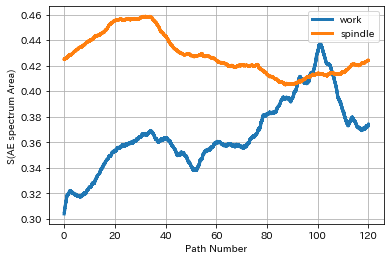

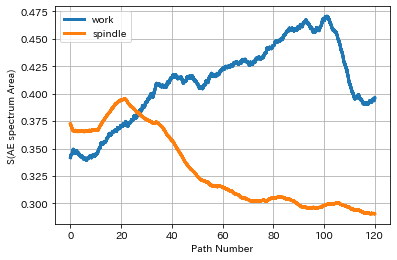

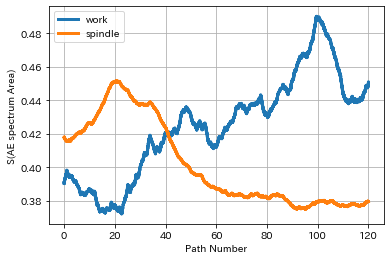

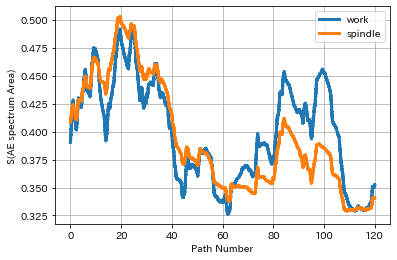

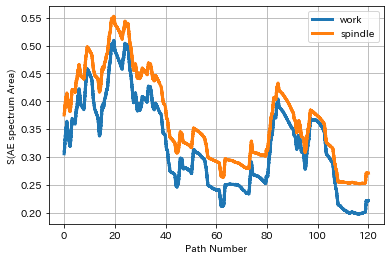

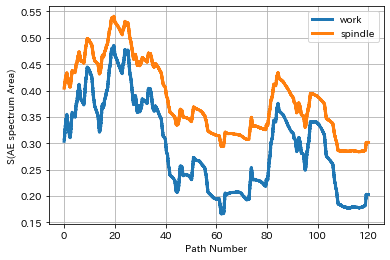

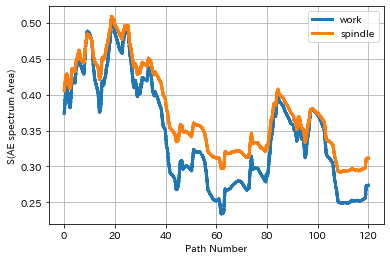

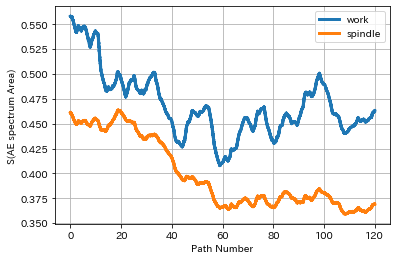

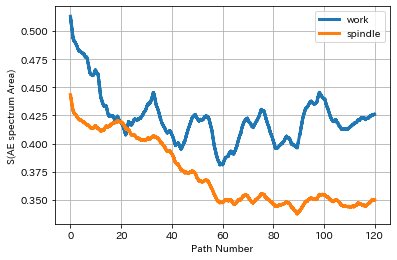

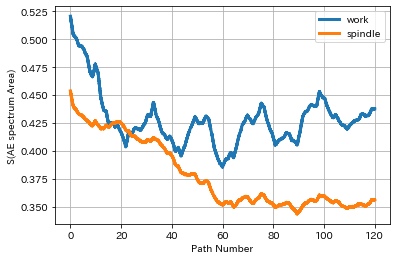

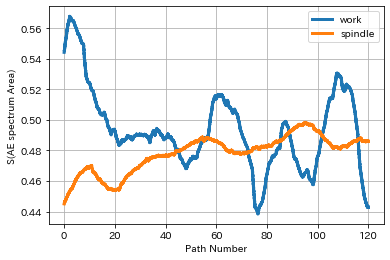

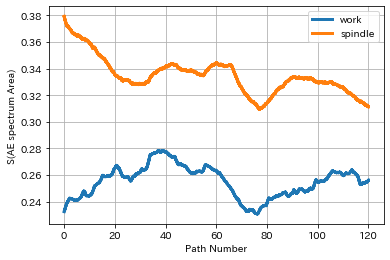

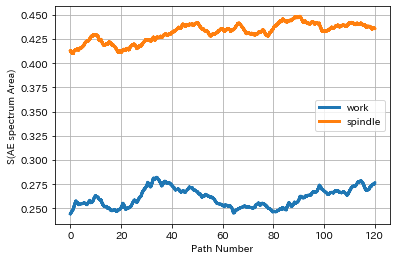

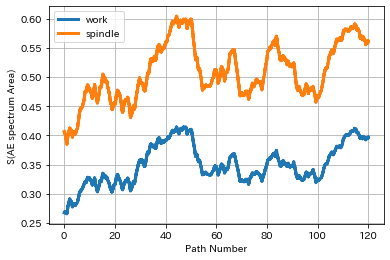

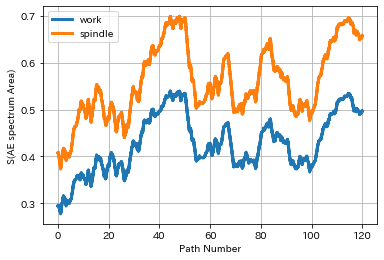

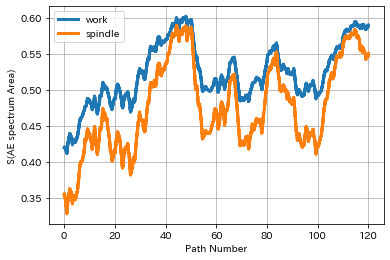

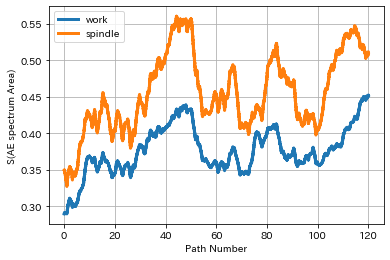

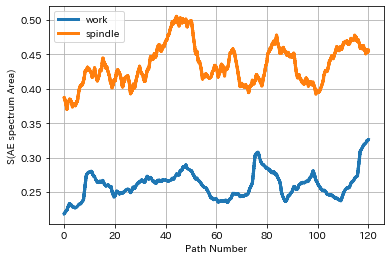

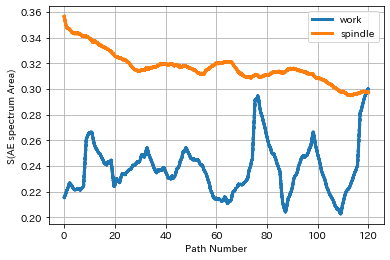

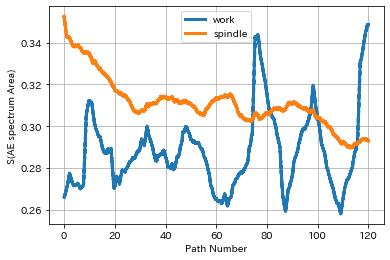

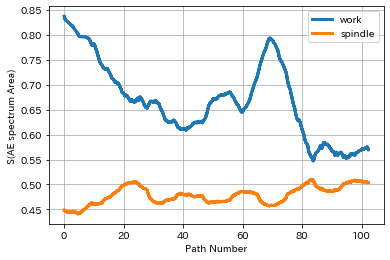

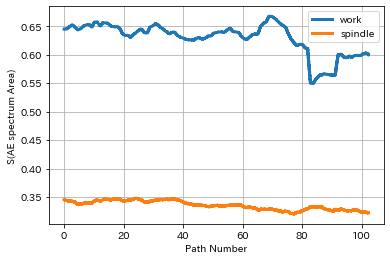

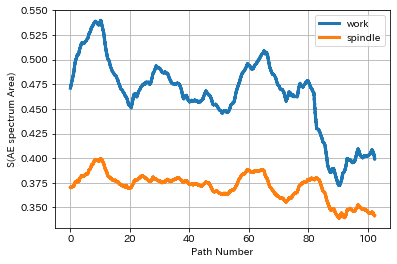

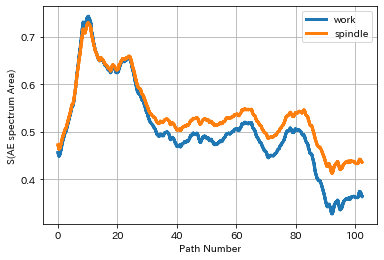

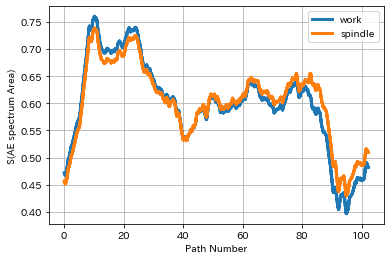

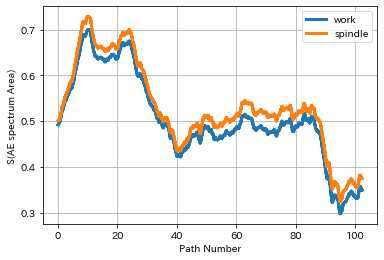

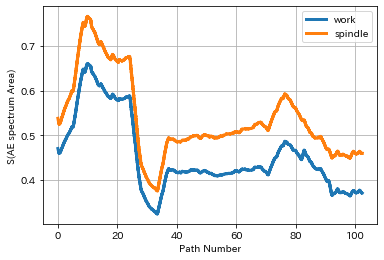

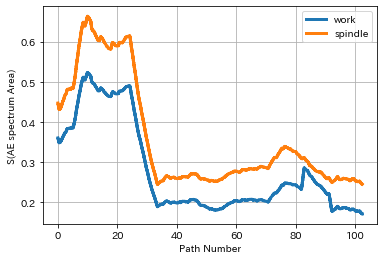

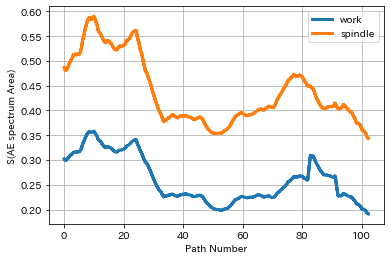

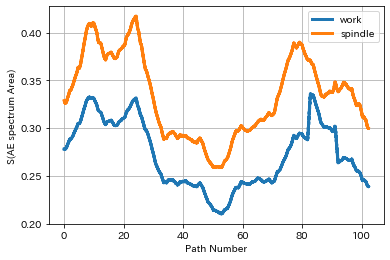

In [267]:
%matplotlib inline

for tool in ["A", "B", "C"]:
    for i in range(1,11):
        s_s = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_spindle_1-120_s{i}.npy")
        s_w = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_work_1-120_s{i}.npy")

        fig = plt.figure()
        ax = fig.add_subplot()
        ax.set_xticks(np.arange(0,120*1200+1, 1200*20))
        ax.set_xticklabels(np.arange(0,120+1,20))
        ax.set_xlabel(xlabel='Path Number')
        ax.set_ylabel(ylabel='S(AE spectrum Area)')
        ax.tick_params(axis = 'x')
        ax.tick_params(axis = 'y')

        # plt.ylim(0.2,0.6)

        plt.plot(s_w, label = "work", linewidth="3")
        plt.plot(s_s, label = "spindle", linewidth="3")

        plt.legend()
        plt.grid()

        plt.savefig(rf"Z:\200 Produced_data\master_paper_data\correlation\AE_sw_corr_1-120_{tool}_s{i}.png")